# How borrower's details affects on the number of delinquent days
## by Ban Choon Chua

## Investigation Overview

I wanted to show, how the borrower's details affects on the number of delinquent days

## Dataset Overview

The dataset consist of 113937 entries with 81 columns. The attributes that were used for this presentation are Credit Score,
Prosper Score, Employment, Type of Loan, Borrower rates, Income, LoanCurrentDaysDelinquent. A total of 751 entries were removed from the analysis due to inconsistencies or missing information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('Prosper_Loan_clean.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Number of applicant's borrower rate

We can see that the borrower rate is between 0.04% to 0.36%, with the majority around 0.14%-0.16%

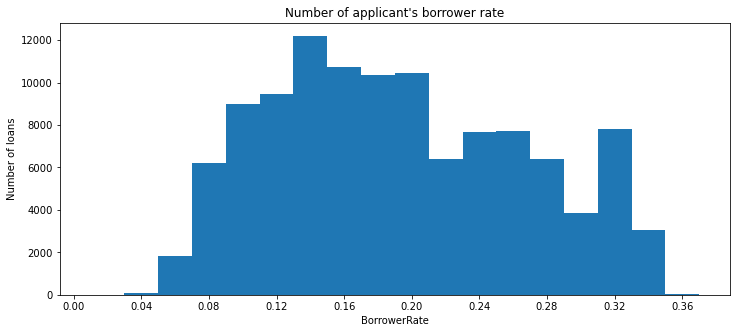

In [3]:
binsize = 0.02
bins = np.arange(df['BorrowerRate'].min()-0.02, df['BorrowerRate'].max()+0.02, binsize)
ticks = np.arange(0,df['BorrowerRate'].max()+0.02, 0.04)

plt.figure(figsize=[12, 5])
plt.hist(data = df, x = 'BorrowerRate', bins = bins)
plt.xticks(ticks)
plt.xlabel('BorrowerRate')
plt.ylabel('Number of loans')
plt.title("Number of applicant's borrower rate");

## Number of applicant's Credit Score

We can see that majority of the borrower has a credit score of 700 +/- 50

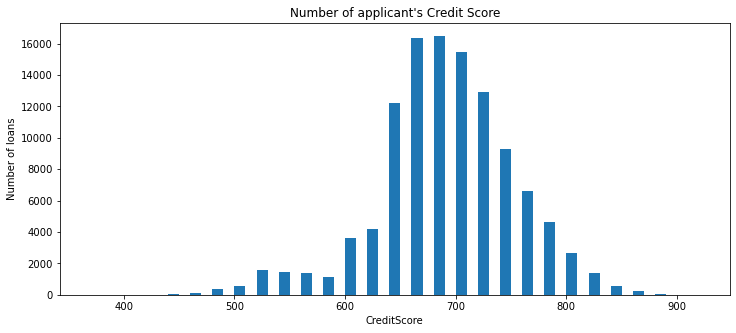

In [4]:
binsize = 10
bins = np.arange(df['CreditScoreRangeLower'].min()-50, df['CreditScoreRangeLower'].max()+50, binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = df, x = 'CreditScoreRangeLower', bins = bins)
plt.xlabel('CreditScore')
plt.ylabel('Number of loans')
plt.title("Number of applicant's Credit Score");

## Pairwise Correlations

As expected, there is a negative correlation between Credit Score and Borrower Rate since the lower the credit score, the higher the borrower rate to cover the risk of delinquencies. However, there is no significant correlation between LoanCurrentDaysDelinquent vs CreditScore and LoanCurrentDaysDelinquent vs BorrowerRate

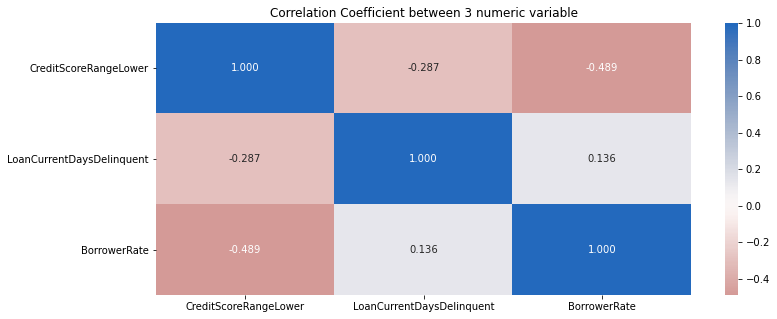

In [5]:
numeric_vars = ['CreditScoreRangeLower', 'LoanCurrentDaysDelinquent', 'BorrowerRate']
plt.figure(figsize = [12, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Coefficient between 3 numeric variable')
plt.show()

## Scatterplot of Credit Score vs Number of Delinquent Days

The scatter plot shows that the higher the borrower's credit score the lower the borrower rate as shown the darker blue at the top indicating low rates and yellow/green at the bottom indicating higher rates of which we expected. However, regardless of the credit score, the days of delinquent are spread out from 0 to 2500 days. Showing us that high credit score with low borrowing rate does not mean lower number of delinquent days

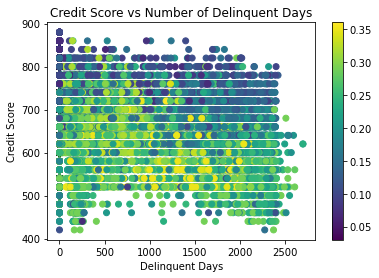

In [6]:
plt.scatter(data = df, x = 'LoanCurrentDaysDelinquent', y = 'CreditScoreRangeLower', c = 'BorrowerRate')
plt.colorbar()
plt.ylabel('Credit Score')
plt.xlabel('Delinquent Days')
plt.title('Credit Score vs Number of Delinquent Days');

In [7]:
!jupyter nbconvert Slides.ipynb --to slides --post serve  --no-input --no-prompt

^C
